**Исследование рынка завединий общественного питания в Москве**

**Цель исследования:** 
- исследовать рынок заведений обественного питания.
- сделать выводы о том где лучше открывать звадение, какого типа оно должно быть и какое количество мест в нем должно быть.

Ссылка на презентацию: https://drive.google.com/file/d/1Rt0yWAnWUZXEvLGvknhaDV7y7FagzuVz/view?usp=sharing

**Шаг 1. Подготовка данных к анализу.**

In [1]:
#!pip install geocoder --user
#установка модуля geocoder, закомментировала, чтобы при перезапуске всех ячеек ноутбука, не начиналась установка

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geocoder
import numpy as np
#импорт необходимых модулей

In [3]:
try:
    rest_data = pd.read_csv('rest_data.csv') 
except:
    rest_data = pd.read_csv('/datasets/rest_data.csv')
#записываем данные из csv-файла в переменную

In [4]:
rest_data.head() #вывожу первые пять строк в датасете

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50


In [5]:
rest_data.info() #общая информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


In [6]:
rest_data.describe().T #статистика по датасету

,count,mean,std,min,25%,50%,75%,max
id,15366.0,119720.066901,73036.130732,838.0,28524.0,144974.5,184262.25,223439.0
number,15366.0,59.547182,74.736833,0.0,12.0,40.0,80.00,1700.0


In [7]:
rest_data.isna().sum() #количество пропусков в датасете

id             0
object_name    0
chain          0
object_type    0
address        0
number         0
dtype: int64

In [8]:
rest_data['object_name'] = rest_data['object_name'].str.lower() #привожу наименование объектов общественного к нижнему регистру
rest_data.sample(20)

,id,object_name,chain,object_type,address,number
9576,166112,ресторан «easy food»,нет,ресторан,"город Москва, Днепропетровская улица, дом 2",48
10686,187587,шаурма,нет,закусочная,"город Москва, улица Декабристов, дом 15, строе...",0
6416,70732,кафе «нияма»,да,кафе,"город Москва, проспект Вернадского, дом 14А",98
2866,111851,прайм,да,кафе,"город Москва, Цветной бульвар, дом 11, строение 2",47
7439,130360,диско-бар «гриль холл»,нет,бар,"город Москва, Холодильный переулок, дом 3",150
8172,74898,бар - ресторан новиков,нет,ресторан,"город Москва, Тверская улица, дом 3",62
6743,144527,кафе,нет,кафе,"город Москва, Волоколамское шоссе, дом 67, стр...",5
15135,207743,пицца хат,да,предприятие быстрого обслуживания,"город Москва, Митинская улица, дом 51",18
12739,183863,каменев василий владимирович,нет,предприятие быстрого обслуживания,"город Москва, улица Сущёвский Вал, дом 5, стро...",2
771,154360,"шаурма, выпечка",нет,предприятие быстрого обслуживания,"город Москва, Новогиреевская улица, дом 20/34,...",0


In [9]:
rest_data[['object_name', 'address', 'object_type']].duplicated().sum() 
#количество дубликатов в датасете

184

In [10]:
rest_data[rest_data[['object_name', 'address', 'object_type']].duplicated()] 
#выгружаю строки дубликаты

,id,object_name,chain,object_type,address,number
115,28614,комбинат питания мгту им.н.э.баумана,нет,буфет,"город Москва, Бригадирский переулок, дом 3-5",12
580,149205,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",35
581,149131,общественное питание,нет,кафе,"город Москва, Павелецкая площадь, дом 1",39
1409,151267,альфорно,нет,кафе,"город Москва, город Зеленоград, корпус 438",45
2375,28604,комбинат питания мгту им.н.э.баумана,нет,столовая,"город Москва, 2-я Бауманская улица, дом 5, стр...",150
...,...,...,...,...,...,...
15173,218542,кофе с собой,да,предприятие быстрого обслуживания,"город Москва, Алтуфьевское шоссе, дом 70, корп...",0
15216,214468,макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Варшавское шоссе, дом 87Б",0
15217,214146,макдоналдс,да,предприятие быстрого обслуживания,"город Москва, Кировоградская улица, дом 13А",0
15363,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20


In [11]:
rest_data = rest_data.drop_duplicates(subset = ['object_name', 'address', 'object_type']) 
#удаление дубликатов из датасета
rest_data[['object_name', 'address', 'object_type']].duplicated().sum()
#количество дубликатов в датасете

0

In [12]:
rest_data['chain'] = rest_data['chain'].map({"да": True, "нет": False})
rest_data['chain'].unique()

array([False,  True])

In [13]:
rest_data['chain'].map({"да": True, "нет": False})

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
15359    NaN
15360    NaN
15361    NaN
15362    NaN
15364    NaN
Name: chain, Length: 15182, dtype: object

In [14]:
rest_data.info() #проверяю изменился ли тип данных в столбце chain

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15182 entries, 0 to 15364
Data columns (total 6 columns):
id             15182 non-null int64
object_name    15182 non-null object
chain          15182 non-null bool
object_type    15182 non-null object
address        15182 non-null object
number         15182 non-null int64
dtypes: bool(1), int64(2), object(3)
memory usage: 726.5+ KB


**Вывод:**
- пропусков в датасете не было обнаружено.
- все значения в стобце object_name привела к нижнему регистру, после чего проверила датасет на количество дубликатов. Проверяла дубликаты по столбцам object_name, address и object_type. Было обнаружено и удалено 184 дубликата.
- с помощью функции bool_type, все значения "да" и "нет" в столбце chain были заменены на значения True и False. Тип данных столбца chain изменился с object на bool.

**Шаг 2. Анализ данных.**

**2.1. Расчет соотношений**

In [15]:
pvt_count = rest_data.pivot_table(index = 'object_type', values = 'id', aggfunc = 'count').reset_index()
pvt_count['ratio'] = round(pvt_count['id']/rest_data['id'].count() *100, 1)
pvt_count = pvt_count.sort_values(by = 'ratio', ascending = True) 
pvt_count #сводная таблица о соотношении видов общественного питания 
#по количеству, в столбце id - количество видов общественного питания, 
#в столбце ratio - доля каждого вида объекта общественного питания от общего числа

,object_type,id,ratio
5,магазин (отдел кулинарии),272,1.8
2,закусочная,347,2.3
4,кафетерий,393,2.6
1,буфет,570,3.8
0,бар,853,5.6
6,предприятие быстрого обслуживания,1890,12.4
7,ресторан,2274,15.0
8,столовая,2575,17.0
3,кафе,6008,39.6


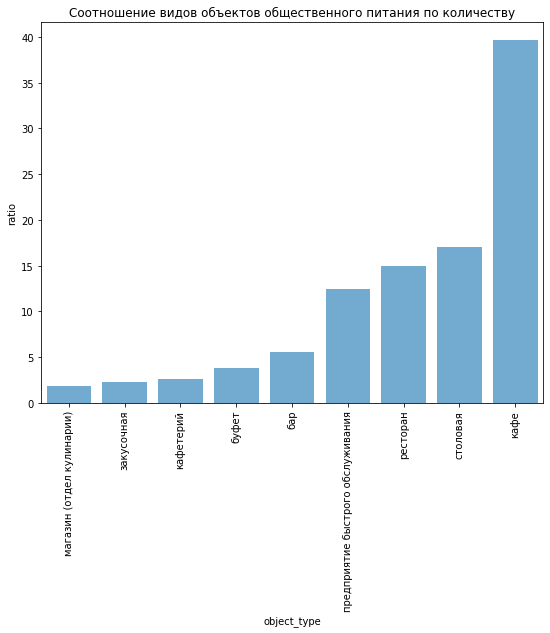

In [16]:
plt.figure(figsize= (9,7)) #размер графика
sns.barplot( x = 'object_type', y = 'ratio', data = pvt_count, color = '#64adde' )
#строю круговую диаграмму
plt.title('Cоотношение видов объектов общественного питания по количеству')
#наименование диаграммы
plt.xticks(rotation= 90)
plt.show()

In [17]:
pvt_chain = rest_data.pivot_table(index = 'chain', values = 'id', aggfunc = 'count')
pvt_chain['ratio'] = round(pvt_chain['id']/rest_data['id'].count() *100, 1)
pvt_chain #сводная таблица о соотношении сетевых и несетевых заведений по количеству, 
#в столбце id - количество видов общественного питания, 
#в столбце ratio - доля сетвых и несетевых заведений от общего числа

,id,ratio
chain,,
False,12234,80.6
True,2948,19.4


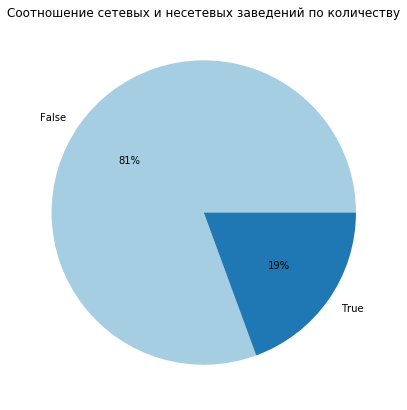

In [18]:
colors = sns.color_palette('Paired')[0:2]
plt.figure(figsize=(7,7)) #размер графика
plt.pie(pvt_chain['ratio'], colors = colors, labels = pvt_chain.index, autopct='%1.0f%%')
#строю круговую диаграмму
plt.title('Соотношение сетевых и несетевых заведений по количеству')
#наименование круговой диаграммы
plt.show()

In [19]:
chain_rest = rest_data[rest_data['chain'] == True]
pvt_chain_true = chain_rest.pivot_table(index = 'object_type', values = 'id', aggfunc = 'count').reset_index()
pvt_chain_true['ratio'] = round(pvt_chain_true['id']/pvt_count['id'] *100, 1)
pvt_chain_true = pvt_chain_true.sort_values(by = 'ratio') 
pvt_chain_true#сводная таблица о соотношении сетевых видов общественного питания по количеству, 
#в столбце id - количество видов общественного питания, 
#в столбце ratio - доля каждого вида объекта общественного питания от общего числа

,object_type,id,ratio
8,столовая,3,0.1
1,буфет,11,1.9
0,бар,37,4.3
4,кафетерий,51,13.0
2,закусочная,56,16.1
3,кафе,1387,23.1
7,ресторан,541,23.8
5,магазин (отдел кулинарии),78,28.7
6,предприятие быстрого обслуживания,784,41.5


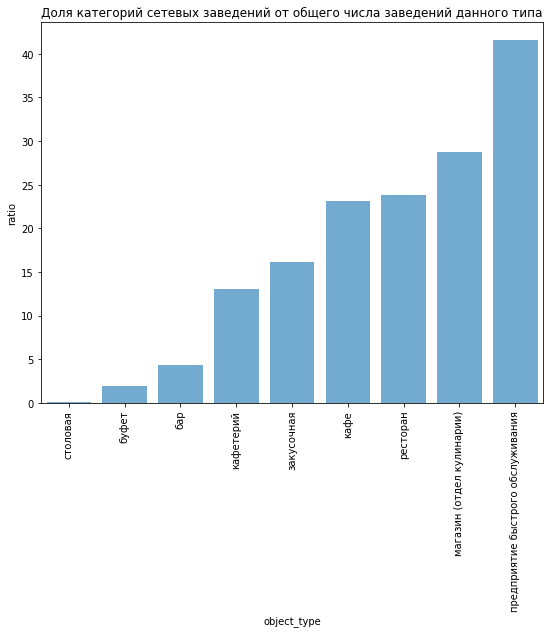

In [20]:
plt.figure(figsize= (9,7)) #размер графика
sns.barplot( x = 'object_type', y = 'ratio', data = pvt_chain_true, color = '#64adde' )
#строю круговую диаграмму
plt.title('Доля категорий сетевых заведений от общего числа заведений данного типа')
#наименование диаграммы
plt.xticks(rotation= 90)
plt.show()

**Вывод:**
- Среди всех заведений больше всего распространены заведения типа: кафе, столовая, ресторан.
- Сетевых заведений намного меньше, чем несетевых. Несетевых заведений 81%, а сетевых - 19%.
- По соотношению сетевых заведений общественного питания ко всем заведениям лидируют заведения типа: предприятие быстрого обслуживания, магазин(отдел кулинарии), ресторан.

**2.2.Исследование сетевых заведений**

In [21]:
pvt_chain_number = chain_rest.pivot_table(index = 'object_name', values = 'number', aggfunc = ['count', 'mean'])
#сводная таблица о количестве сетевых заведений и среднем количестве посадочных мест в нем
pvt_chain_number.columns = ['count_rest', 'mean_number'] #меняю наименование столбцов
pvt_chain_number.sort_values(by = 'count_rest', ascending = False) #сортирую по убываю количетва заведений

,count_rest,mean_number
object_name,,
kfc,155,55.341935
шоколадница,154,57.844156
макдоналдс,148,88.378378
бургер кинг,136,46.889706
теремок,94,25.606383
...,...,...
кафе «торнадо»,1,80.000000
кафе «тапчан»,1,70.000000
кафе «тануки»,1,150.000000


In [22]:
def count_chain_rest(row, 
                     min_p = np.percentile(pvt_chain_number['count_rest'], 25),
                     max_p = np.percentile(pvt_chain_number['count_rest'], 75)):
    """Функция для категоризации сетевых заведений по их количеству"""
    if row <= min_p:
        return 'маленькое количество филиалов'
    elif row > min_p and row <= max_p:
        return 'среднее количество филиалов'
    return 'большое количество филиалов'

In [23]:
pvt_chain_number['categorized_count'] = pvt_chain_number['count_rest'].apply(count_chain_rest)
#применяю функцию count_chain_rest к столбцу count_rest
pvt_chain_number

,count_rest,mean_number,categorized_count
object_name,,,
beverly hills diner,1,88.000000,маленькое количество филиалов
bierloga,1,75.000000,маленькое количество филиалов
black & white,1,40.000000,маленькое количество филиалов
bocconcino,3,66.666667,среднее количество филиалов
boobo,1,46.000000,маленькое количество филиалов
...,...,...,...
ямми микс,1,2.000000,маленькое количество филиалов
ян примус,1,300.000000,маленькое количество филиалов
японский ресторан «ваби-саби»,1,155.000000,маленькое количество филиалов


In [24]:
pvt_categorized_rest = pvt_chain_number.pivot_table(index = 'categorized_count', 
                                                    values = 'mean_number', 
                                                    aggfunc = ['count', 'mean'])
pvt_categorized_rest.columns = ['Количество заведений', 'Среднее количество мест']
pvt_categorized_rest #сводная таблица о количестве сетевых заведений 
#с маленьким, средним и большим количеством филлиалов по городу

,Количество заведений,Среднее количество мест
categorized_count,,
большое количество филиалов,123,57.812534
маленькое количество филиалов,333,59.009009
среднее количество филиалов,120,60.647222


In [25]:
pvt_object_number = rest_data.pivot_table(index = 'object_type', values = 'number', aggfunc = 'mean').reset_index()
pvt_object_number = pvt_object_number.sort_values(by = 'number') 
pvt_object_number #сводная таблица о среднем количестве посадочных мест для каждого типа объекта общественного питания

,object_type,number
5,магазин (отдел кулинарии),5.610294
2,закусочная,7.685879
4,кафетерий,9.221374
6,предприятие быстрого обслуживания,20.787302
3,кафе,39.886984
0,бар,43.602579
1,буфет,51.487719
7,ресторан,97.065963
8,столовая,130.367767


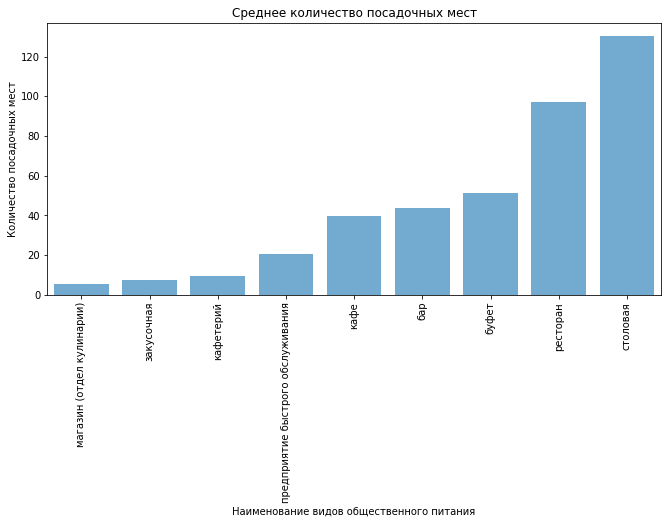

In [26]:
plt.figure(figsize=(11,5)) #размер графика
sns.barplot(x='object_type', y='number', data = pvt_object_number, color = '#64adde')
#строю столбчатую диаграмму
plt.title('Cреднее количество посадочных мест') #наименование графика
plt.xticks(rotation= 90) #располагаю подписи каждого столбца диаграамы под углом
plt.xlabel('Наименование видов общественного питания') #наименование оси X
plt.ylabel('Количество посадочных мест') #наименование оси Y
plt.show()

**Вывод:**
- Для сетевых заведений характерно: маленькое количество филиалов с средним количеством мест окло 59, и примерно равное количество заведений с средним и большим количеством филиалов с количеством мест около 57 и 60 соответственно.
- Среднее количество посадочных мест больше в четевых заведениях типа: столовая, ресторан, буфет.

**2.3.Рассчет количества заведений на улицах и районах города**

In [27]:
def street_name(row):
    """Функция для выбора улицы из полного адреса"""
    streets_names = ['улица','проспект','шоссе','проезд','бульвар','переулок','набережная','площадь','вал','аллея', 'тупик', 
                     'квартал', 'линия', 'микрорайон']
    street = row.split(',') #разделяю строку по запятой
    for i in street: #ищу наименование из списка streets_names в каждом значении из списка street
        for st in streets_names:
            if st in i: #если значение найдено, то взврааем его 
                return i
    return np.nan #если значение не найдено, то возвращаем Nan

In [28]:
rest_data['street'] = rest_data['address'].apply(street_name) #применяю функцию к столбцу address
rest_data[rest_data['street'].isna()] #смотрю как много получилось пропусков

,id,object_name,chain,object_type,address,number,street
1405,20199,это,False,кафе,"город Москва, город Зеленоград, корпус 401",35,NaN
1406,68113,френдс,False,кафе,"город Москва, город Зеленоград, корпус 435",34,NaN
1407,20105,кафе «граф монте-кристо»,False,кафе,"город Москва, город Зеленоград, корпус 436",40,NaN
1408,22982,альфорно,False,кафе,"город Москва, город Зеленоград, корпус 438",49,NaN
1410,150537,кафе «вечный зов»,False,кафе,"город Москва, город Зеленоград, корпус 834А",30,NaN
...,...,...,...,...,...,...,...
14997,216942,шашлычный дворик,False,кафе,"город Москва, поселение Десеновское, деревня В...",15,NaN
14998,216926,кафе «сахли»,False,закусочная,"город Москва, поселение Десеновское, деревня В...",10,NaN
15015,208239,газпромнефть,False,кафе,"поселение ""Мосрентген"", деревня Дудкино, владе...",20,NaN
15137,209920,дюшес,True,ресторан,"город Москва, город Зеленоград, Проезд № 4806,...",100,NaN


In [29]:
rest_data['address'].str.split(', ', expand=True).sample(20)

,0,1,2,3,4,5,6
14981,город Москва,поселение Десеновское,деревня Ватутинки,дом 34,None,None,None
9992,город Москва,Никитский переулок,дом 7,строение 2,None,None,None
7553,город Москва,Бесединское шоссе,дом 15,None,None,None,None
14448,город Москва,Ленинградское шоссе,дом 16А,строение 4,None,None,None
3498,город Москва,Ленинградский проспект,дом 22,None,None,None,None
14292,город Москва,улица Кржижановского,владение 22,строение 1,None,None,None
8497,город Москва,поселение Сосенское,Калужское шоссе,22-й километр,дом 10,None,None
4087,город Москва,улица Мусы Джалиля,дом 27,корпус 3,None,None,None
2348,город Москва,Бакунинская улица,дом 7,строение 5,None,None,None
7151,город Москва,улица Клары Цеткин,дом 28,None,None,None,None


In [30]:
pvt_street_count = rest_data.pivot_table(index = 'street', values = 'id', aggfunc = 'count').reset_index()
pvt_street = pvt_street_count.sort_values(by ='id', ascending = False).head(10)
pvt_street #сводная таблица о топ 10 улицах с самым большим количеством заведений

,street,id
1428,проспект Мира,196
1012,Профсоюзная улица,180
687,Ленинградский проспект,170
997,Пресненская набережная,165
401,Варшавское шоссе,162
690,Ленинский проспект,147
1424,проспект Вернадского,126
677,Кутузовский проспект,114
600,Каширское шоссе,110
607,Кировоградская улица,107


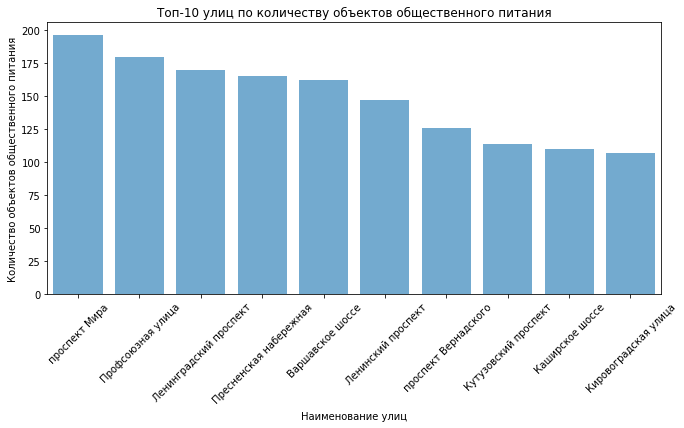

In [31]:
plt.figure(figsize=(11,5))
sns.barplot(x='street', y='id', data = pvt_street, color = '#64adde')
plt.title('Топ-10 улиц по количеству объектов общественного питания')
plt.xticks(rotation= 45)
plt.xlabel('Наименование улиц')
plt.ylabel('Количество объектов общественного питания')
plt.show() #строю столбчатую диаграмму по количеству объектов общественного питания на каждой улице

In [32]:
def district(row):
    """Функция по определению района, в котором находится улица"""
    dist = str(geocoder.osm(row+ ', Moscow'))
    #используя библиотеку geocoder, передаем строку с улицей в geocoder.osm
    dist_split = dist.split(',') #
    for i in dist_split: 
        if 'район' in i:
            return i
    return np.nan

In [33]:
pvt_street['district'] = pvt_street['street'].apply(district) #применяю функцию district к столбцу street
pvt_street 

,street,id,district
1428,проспект Мира,196,Мещанский район
1012,Профсоюзная улица,180,Обручевский район
687,Ленинградский проспект,170,район Беговой
997,Пресненская набережная,165,Пресненский район
401,Варшавское шоссе,162,район Чертаново Южное
690,Ленинский проспект,147,Гагаринский район
1424,проспект Вернадского,126,район Проспект Вернадского
677,Кутузовский проспект,114,район Дорогомилово
600,Каширское шоссе,110,район Нагатино-Садовники
607,Кировоградская улица,107,район Чертаново Центральное


In [34]:
pvt_one_object = pvt_street_count[pvt_street_count['id'] == 1]
pvt_one_object #сводная таблица ао улицам, имеющих одно заведение общественного питания

,street,id
2,1-й Балтийский переулок,1
3,1-й Басманный переулок,1
4,1-й Ботанический проезд,1
7,1-й Вешняковский проезд,1
9,1-й Голутвинский переулок,1
...,...,...
1947,улица Знаменка,1
1948,улица Каманина,1
1951,улица Миклухо-Маклая,1
1952,улица Обручева,1


In [35]:
pvt_one_object['district'] = pvt_one_object['street'].apply(district) #применяю функцию district к столбцу street
pvt_one_object

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,street,id,district
2,1-й Балтийский переулок,1,район Аэропорт
3,1-й Басманный переулок,1,Басманный район
4,1-й Ботанический проезд,1,район Свиблово
7,1-й Вешняковский проезд,1,Рязанский район
9,1-й Голутвинский переулок,1,район Якиманка
...,...,...,...
1947,улица Знаменка,1,район Арбат
1948,улица Каманина,1,район Лианозово
1951,улица Миклухо-Маклая,1,район Коньково
1952,улица Обручева,1,Обручевский район


In [36]:
def graph(data, title):
    """Функция для построения распределения"""
    ax =sns.distplot(data)
    ax.set_xlabel('Распределение количества посадочных мест')
    ax.set_title(title)
    plt.show()

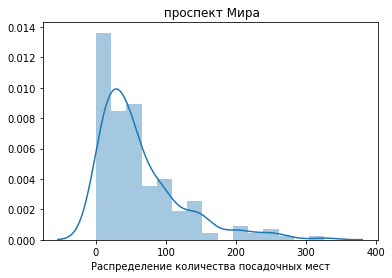

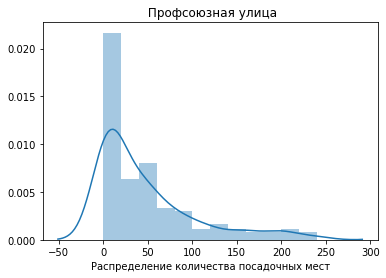

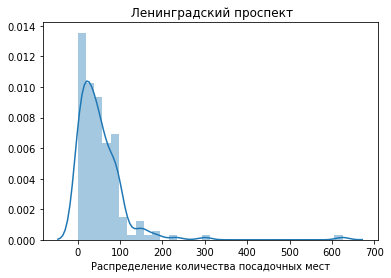

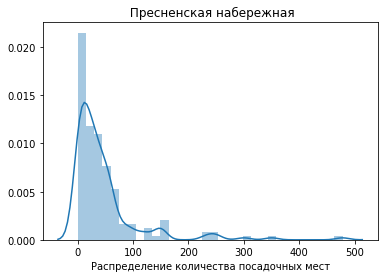

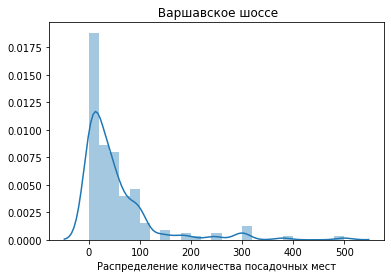

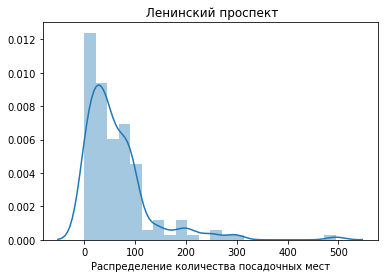

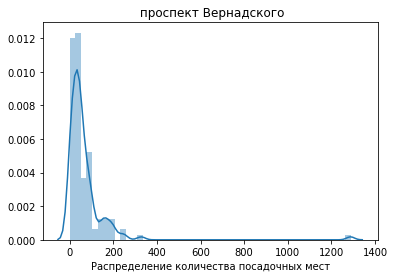

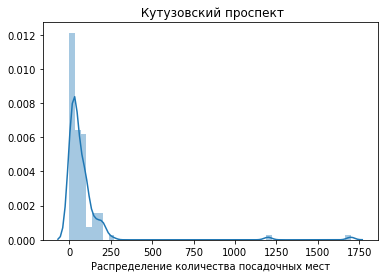

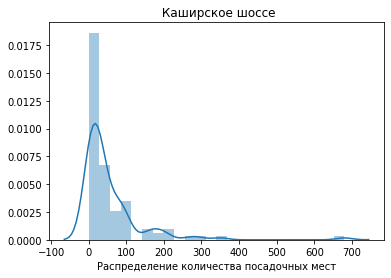

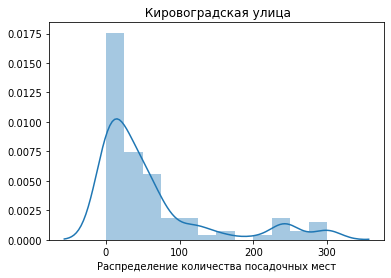

In [37]:
for i in pvt_street['street']: #для всех улиц, строю распределение количества посадочных мест
    graph(rest_data[rest_data['street'] == i]['number'], i)

**Вывод:**
- Для топ 10 улиц по количеству заведений, находящихся на них, характерно что пик распределения мест находится между 0 и 100, но всегда ближе к нулю.

**Общий вывод:**
Целью исследования было проанализировать рынок заведений общественного питания и сделать выводы о том, заведение какого вида лучше открывать и где.

Открыть лучше кафе со средним количеством мест около 40, это среднее количество мест для заведений типа кафе.

Открывать кафе лучше в одном из районов: Мещанский, Беговой, Пресненский, Гагаринский, Дрогомилово. Эти районы находятся либо в центре либо очень близко к центру, благодаря этому там будет большой поток людей.